In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [15]:
pd.date_range('2014-05-01','2014-05-07',freq=pd.datetools.bday)
print pd.date_range('2014-05-01','2014-05-07',freq=pd.datetools.bday)

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-05-01, ..., 2014-05-07]
Length: 5, Freq: B, Timezone: None


In [81]:
date_stngs = ['2014-05-01','2014-05-02','2014-05-05','2014-05-06','2014-05-07']
#tradeDates=[pd.to_datetime(date) for date in date_stngs]
tradeDates=pd.to_datetime(pd.Series(date_stngs))

In [84]:
tradeDates

0   2014-05-01
1   2014-05-02
2   2014-05-05
3   2014-05-06
4   2014-05-07
dtype: datetime64[ns]

In [78]:
closingPrices=[531.35,527.93,527.81,515.14,509.96]

In [85]:
googClosingPrices=pd.DataFrame(data=closingPrices,
                                        columns=['closingPrice'], 
                                        index=tradeDates)


In [86]:
googClosingPrices

,closingPrice
2014-05-01,531.35
2014-05-02,527.93
2014-05-05,527.81
2014-05-06,515.14
2014-05-07,509.96


In [48]:
import datetime
goog = web.get_data_yahoo("GOOG", start=datetime.datetime(2014, 5, 1), end=datetime.datetime(2014, 5, 7))

In [49]:
goog

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-05-01,527.10999,532.92999,523.88000,531.34998,1900300,531.34998
2014-05-02,533.76001,534.00000,525.60999,527.92999,1683900,527.92999
2014-05-05,524.82001,528.90002,521.32001,527.81000,1021300,527.81000
2014-05-06,525.22998,526.81000,515.06000,515.14001,1684400,515.14001
2014-05-07,515.78998,516.67999,503.29999,509.95999,3215500,509.95999


In [50]:
googFinalPrices=pd.DataFrame(goog['Close'], index=tradeDates)

In [52]:
googFinalPrices

,Close
2014-05-01,531.34998
2014-05-02,527.92999
2014-05-05,527.81000
2014-05-06,515.14001
2014-05-07,509.95999


In [87]:
googClosingPricesCDays=googClosingPrices.asfreq('D')
googClosingPricesCDays

,closingPrice
2014-05-01,531.35
2014-05-02,527.93
2014-05-03,NaN
2014-05-04,NaN
2014-05-05,527.81
2014-05-06,515.14
2014-05-07,509.96


In [88]:
googClosingPricesCDays.isnull()

,closingPrice
2014-05-01,False
2014-05-02,False
2014-05-03,True
2014-05-04,True
2014-05-05,False
2014-05-06,False
2014-05-07,False


In [89]:
googClosingPricesCDays.notnull()

,closingPrice
2014-05-01,True
2014-05-02,True
2014-05-03,False
2014-05-04,False
2014-05-05,True
2014-05-06,True
2014-05-07,True


In [94]:
type(tradeDates)

pandas.core.series.Series

In [95]:
tDates=tradeDates.copy()
tDates[1]=np.NaN
tDates[4]=np.NaN


In [96]:
tDates

0   2014-05-01
1          NaT
2   2014-05-05
3   2014-05-06
4          NaT
dtype: datetime64[ns]

In [98]:
FBVolume=[82.34,54.11,45.99,55.86,78.5]
TWTRVolume=[15.74,12.71,10.39,134.62,68.84]

In [100]:
socialTradingVolume=pd.concat([pd.Series(FBVolume),
                               pd.Series(TWTRVolume),
                               tradeDates], axis=1,
                               keys=['FB','TWTR','TradeDate'])
socialTradingVolume

,FB,TWTR,TradeDate
0,82.34,15.74,2014-05-01
1,54.11,12.71,2014-05-02
2,45.99,10.39,2014-05-05
3,55.86,134.62,2014-05-06
4,78.50,68.84,2014-05-07


In [101]:
socialTradingVolTS=socialTradingVolume.set_index('TradeDate')
socialTradingVolTS


,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [103]:
socialTradingVolTSCal=socialTradingVolTS.asfreq('D')
socialTradingVolTSCal


,FB,TWTR
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,NaN,NaN
2014-05-04,NaN,NaN
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [104]:
socialTradingVolTSCal['FB']+socialTradingVolTSCal['TWTR']

2014-05-01     98.08
2014-05-02     66.82
2014-05-03       NaN
2014-05-04       NaN
2014-05-05     56.38
2014-05-06    190.48
2014-05-07    147.34
Freq: D, dtype: float64

In [105]:
pd.Series([1.0,np.NaN,5.9,6])+pd.Series([3,5,2,5.6])

0     4.0
1     NaN
2     7.9
3    11.6
dtype: float64

In [106]:
pd.Series([1.0,25.0,5.5,6])/pd.Series([3,np.NaN,2,5.6])

0    0.333333
1         NaN
2    2.750000
3    1.071429
dtype: float64

In [107]:
np.mean([1.0,np.NaN,5.9,6])

nan

In [108]:
np.sum([1.0,np.NaN,5.9,6])

nan

In [109]:
pd.Series([1.0,np.NaN,5.9,6]).sum()

12.9

In [110]:
pd.Series([1.0,np.NaN,5.9,6]).mean()

4.2999999999999998

In [111]:
np.nanmean([1.0,np.NaN,5.9,6])

4.2999999999999998

In [112]:
np.nansum([1.0,np.NaN,5.9,6])

12.9

In [113]:
socialTradingVolTSCal

,FB,TWTR
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,NaN,NaN
2014-05-04,NaN,NaN
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [114]:
socialTradingVolTSCal.fillna(100)

,FB,TWTR
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,100.00,100.00
2014-05-04,100.00,100.00
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [115]:
socialTradingVolTSCal.fillna(method='ffill')

,FB,TWTR
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,54.11,12.71
2014-05-04,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [119]:
socialTradingVolTSCal.fillna(method='pad')

,FB,TWTR
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,54.11,12.71
2014-05-04,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [117]:
socialTradingVolTSCal.fillna(method='bfill')

,FB,TWTR
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,45.99,10.39
2014-05-04,45.99,10.39
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [118]:
socialTradingVolTSCal.dropna()

,FB,TWTR
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [120]:
socialTradingVolTSCal.dropna()

,FB,TWTR
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [121]:
pd.set_option('display.precision',4)
socialTradingVolTSCal.interpolate()


,FB,TWTR
2014-05-01,82.340,15.740
2014-05-02,54.110,12.710
2014-05-03,51.403,11.937
2014-05-04,48.697,11.163
2014-05-05,45.990,10.390
2014-05-06,55.860,134.620
2014-05-07,78.500,68.840


In [122]:
ibmData=pd.read_csv('./data/ibm-common-stock-closing-prices-1959_1960.csv')

In [123]:
ibmData.head()

,TradeDate,closingPrice
0,1959-06-29,445
1,1959-06-30,448
2,1959-07-01,450
3,1959-07-02,447
4,1959-07-06,451


In [124]:
type(ibmData['TradeDate'])

pandas.core.series.Series

In [125]:
type(ibmData['TradeDate'][0])

str

In [126]:
ibmData['TradeDate']=pd.to_datetime(ibmData['TradeDate'])
type(ibmData['TradeDate'][0])

pandas.tslib.Timestamp

In [127]:
#Convert DataFrame to TimeSeries
#Resampling creates NaN rows for weekend dates, hence use dropna
ibmTS=ibmData.set_index('TradeDate').resample('D')['closingPrice'].dropna()
ibmTS


TradeDate
1959-06-29    445
1959-06-30    448
1959-07-01    450
1959-07-02    447
1959-07-06    451
1959-07-07    453
1959-07-08    454
1959-07-09    454
1959-07-10    459
1959-07-13    440
1959-07-14    446
1959-07-15    443
1959-07-16    443
1959-07-17    440
1959-07-20    439
...
1960-06-10    529
1960-06-13    530
1960-06-14    531
1960-06-15    527
1960-06-16    525
1960-06-17    519
1960-06-20    514
1960-06-21    509
1960-06-22    505
1960-06-23    513
1960-06-24    525
1960-06-27    519
1960-06-28    519
1960-06-29    522
1960-06-30    522
Name: closingPrice, Length: 255

<h3>DateOffset and TimeDelta objects</h3>

<h3>DateOffset</h3>

In [128]:
xmasDay=pd.datetime(2014,12,25)
xmasDay


datetime.datetime(2014, 12, 25, 0, 0)

In [129]:
boxingDay=xmasDay+pd.DateOffset(days=1)
boxingDay


Timestamp('2014-12-26 00:00:00')

In [131]:
today=pd.datetime.now()
today

datetime.datetime(2015, 4, 28, 3, 46, 16, 634425)

In [132]:
today+pd.DateOffset(weeks=1)

Timestamp('2015-05-05 03:46:16.634425')

In [134]:
today+2*pd.DateOffset(years=2, months=6)

Timestamp('2020-04-28 03:46:16.634425')

In [135]:
lastDay=pd.datetime(2013,12,31)

In [136]:
from pandas.tseries.offsets import QuarterBegin
dtoffset=QuarterBegin()
lastDay+dtoffset


Timestamp('2014-03-01 00:00:00')

In [137]:
dtoffset.rollforward(lastDay)

Timestamp('2014-03-01 00:00:00')

In [138]:
firstQuarterLastDay=pd.datetime(2015,3,31)

In [139]:
dtoffset.rollforward(firstQuarterLastDay)

Timestamp('2015-06-01 00:00:00')

In [145]:
weekDelta=datetime.timedelta(weeks=1)
weekDelta

datetime.timedelta(7)

In [146]:
today=pd.datetime.now()
today


datetime.datetime(2015, 4, 28, 4, 23, 32, 335486)

In [147]:
today+weekDelta

datetime.datetime(2015, 5, 5, 4, 23, 32, 335486)

<b> 1 week from today</b>

In [148]:
today+pd.DateOffset(weeks=1)

Timestamp('2015-05-05 04:23:32.335486')

<b>5 years from today</b>

In [149]:
today+2*pd.DateOffset(years=2, months=6)

Timestamp('2020-04-28 04:23:32.335486')

<b>Roll forward functionality</b>

In [150]:
lastDay=pd.datetime(2013,12,31)
from pandas.tseries.offsets import QuarterBegin
dtoffset=QuarterBegin()
lastDay+dtoffset


Timestamp('2014-03-01 00:00:00')

In [151]:
dtoffset.rollforward(lastDay)

Timestamp('2014-03-01 00:00:00')

<h3>TimeDelta</h3>

In [152]:
weekDelta=datetime.timedelta(weeks=1)
weekDelta


datetime.timedelta(7)

In [153]:
today=pd.datetime.now()
today


datetime.datetime(2015, 4, 30, 4, 30, 39, 548725)

In [154]:
today+weekDelta

datetime.datetime(2015, 5, 7, 4, 30, 39, 548725)

<h2>Time series-related instance methods<h2>
<h3>Shifting / lagging</h3>

In [155]:
ibmTS.shift(3)

TradeDate
1959-06-29    NaN
1959-06-30    NaN
1959-07-01    NaN
1959-07-02    445
1959-07-06    448
1959-07-07    450
1959-07-08    447
1959-07-09    451
1959-07-10    453
1959-07-13    454
1959-07-14    454
1959-07-15    459
1959-07-16    440
1959-07-17    446
1959-07-20    443
...
1960-06-10    525
1960-06-13    541
1960-06-14    531
1960-06-15    529
1960-06-16    530
1960-06-17    531
1960-06-20    527
1960-06-21    525
1960-06-22    519
1960-06-23    514
1960-06-24    509
1960-06-27    505
1960-06-28    513
1960-06-29    525
1960-06-30    519
Name: closingPrice, Length: 255

<b>Shift only on business days</b>

In [156]:
ibmTS.shift(3, freq=pd.datetools.bday)

TradeDate
1959-07-02    445
1959-07-03    448
1959-07-06    450
1959-07-07    447
1959-07-09    451
1959-07-10    453
1959-07-13    454
1959-07-14    454
1959-07-15    459
1959-07-16    440
1959-07-17    446
1959-07-20    443
1959-07-21    443
1959-07-22    440
1959-07-23    439
...
1960-06-15    529
1960-06-16    530
1960-06-17    531
1960-06-20    527
1960-06-21    525
1960-06-22    519
1960-06-23    514
1960-06-24    509
1960-06-27    505
1960-06-28    513
1960-06-29    525
1960-06-30    519
1960-07-01    519
1960-07-04    522
1960-07-05    522
Name: closingPrice, Length: 255

<h3>Frequency Conversion</h3>

In [157]:
ibmTS.asfreq('BM')

1959-06-30    448
1959-07-31    428
1959-08-31    425
1959-09-30    411
1959-10-30    411
1959-11-30    428
1959-12-31    439
1960-01-29    418
1960-02-29    419
1960-03-31    445
1960-04-29    453
1960-05-31    504
1960-06-30    522
Freq: BM, Name: closingPrice, dtype: float64

In [159]:
ibmTS.asfreq('H')

1959-06-29 00:00:00    445
1959-06-29 01:00:00    NaN
1959-06-29 02:00:00    NaN
1959-06-29 03:00:00    NaN
1959-06-29 04:00:00    NaN
1959-06-29 05:00:00    NaN
1959-06-29 06:00:00    NaN
1959-06-29 07:00:00    NaN
1959-06-29 08:00:00    NaN
1959-06-29 09:00:00    NaN
1959-06-29 10:00:00    NaN
1959-06-29 11:00:00    NaN
1959-06-29 12:00:00    NaN
1959-06-29 13:00:00    NaN
1959-06-29 14:00:00    NaN
...
1960-06-29 10:00:00    NaN
1960-06-29 11:00:00    NaN
1960-06-29 12:00:00    NaN
1960-06-29 13:00:00    NaN
1960-06-29 14:00:00    NaN
1960-06-29 15:00:00    NaN
1960-06-29 16:00:00    NaN
1960-06-29 17:00:00    NaN
1960-06-29 18:00:00    NaN
1960-06-29 19:00:00    NaN
1960-06-29 20:00:00    NaN
1960-06-29 21:00:00    NaN
1960-06-29 22:00:00    NaN
1960-06-29 23:00:00    NaN
1960-06-30 00:00:00    522
Freq: H, Name: closingPrice, Length: 8809

<h3>Re-sampling of data</h3>

In [160]:
import pandas.io.data as web
import datetime


In [161]:
googTickData=web.get_data_yahoo("GOOG", 
                      start=datetime.datetime(2014, 5, 27), 
                      end=datetime.datetime(2014, 5, 27))


In [162]:
googTickData.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-05-27,556,566,554.35,565.95,2098400,565.95


In [164]:
googTickData=pd.read_csv('./data/GOOG_tickdata_20140527.csv')
googTickData.head()

,Timestamp,close,high,low,open,volume
0,1401197402,555.008,556.41,554.35,556.38,81100
1,1401197460,556.250,556.30,555.25,555.25,18500
2,1401197526,556.730,556.75,556.05,556.39,9900
3,1401197582,557.480,557.67,556.73,556.73,14700
4,1401197642,558.155,558.66,557.48,557.59,15700


In [165]:
googTickData['tstamp']=pd.to_datetime(googTickData['Timestamp'],unit='s',utc=True)

In [166]:
googTickData.head()

,Timestamp,close,high,low,open,volume,tstamp
0,1401197402,555.008,556.41,554.35,556.38,81100,2014-05-27 13:30:02
1,1401197460,556.250,556.30,555.25,555.25,18500,2014-05-27 13:31:00
2,1401197526,556.730,556.75,556.05,556.39,9900,2014-05-27 13:32:06
3,1401197582,557.480,557.67,556.73,556.73,14700,2014-05-27 13:33:02
4,1401197642,558.155,558.66,557.48,557.59,15700,2014-05-27 13:34:02


<b>Make the tstamp column the index, while also eliminating the epoch Timestamp column:</b>

In [172]:
googTickTS=googTickData.set_index('tstamp')
googTickTS=googTickTS.drop('Timestamp',axis=1)
googTickTS.head()


,close,high,low,open,volume
tstamp,,,,,
2014-05-27 13:30:02,555.008,556.41,554.35,556.38,81100
2014-05-27 13:31:00,556.250,556.30,555.25,555.25,18500
2014-05-27 13:32:06,556.730,556.75,556.05,556.39,9900
2014-05-27 13:33:02,557.480,557.67,556.73,556.73,14700
2014-05-27 13:34:02,558.155,558.66,557.48,557.59,15700


<b>Convert to US Eastern standard time:</b>

In [173]:
googTickTS.index=googTickTS.index.tz_localize('UTC').tz_convert('US/Eastern')
googTickTS.head()

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:02-04:00,555.008,556.41,554.35,556.38,81100
2014-05-27 09:31:00-04:00,556.250,556.30,555.25,555.25,18500
2014-05-27 09:32:06-04:00,556.730,556.75,556.05,556.39,9900
2014-05-27 09:33:02-04:00,557.480,557.67,556.73,556.73,14700
2014-05-27 09:34:02-04:00,558.155,558.66,557.48,557.59,15700


In [174]:
googTickTS.tail()

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 15:56:00-04:00,565.430,565.48,565.30,565.385,14300
2014-05-27 15:57:00-04:00,565.305,565.46,565.20,565.400,14700
2014-05-27 15:58:00-04:00,565.110,565.31,565.10,565.310,23200
2014-05-27 15:59:00-04:00,565.940,566.00,565.08,565.230,55600
2014-05-27 16:00:00-04:00,565.950,565.95,565.95,565.950,126000


In [176]:
len(googTickTS)

390

<b>Using downsampling to obtain a snapshot every 5 min instead of every minute</b>

In [177]:
googTickTS.resample('5Min').head(6)

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:00-04:00,556.725,557.158,555.972,556.468,27980
2014-05-27 09:35:00-04:00,556.936,557.648,556.851,557.342,24620
2014-05-27 09:40:00-04:00,556.486,556.800,556.277,556.607,8620
2014-05-27 09:45:00-04:00,557.053,557.276,556.738,556.966,9720
2014-05-27 09:50:00-04:00,556.662,556.936,556.464,556.803,14560
2014-05-27 09:55:00-04:00,555.966,556.354,555.858,556.236,12400


In [178]:
googTickTS.resample('10Min', how=np.min).head(4)

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:00-04:00,555.008,556.300,554.35,555.25,9900
2014-05-27 09:40:00-04:00,556.190,556.560,556.13,556.35,3500
2014-05-27 09:50:00-04:00,554.770,555.550,554.77,555.55,3400
2014-05-27 10:00:00-04:00,554.580,554.985,554.45,554.58,1800


<b>Specify whether right or left interval closed</b>

In [179]:
pd.set_option('display.precision',5)
googTickTS.resample('5Min', closed='right').tail(3)


,close,high,low,open,volume
tstamp,,,,,
2014-05-27 15:45:00-04:00,564.3167,564.3733,564.1075,564.1700,12816.6667
2014-05-27 15:50:00-04:00,565.1128,565.1725,565.0090,565.0650,13325.0000
2014-05-27 15:55:00-04:00,565.5158,565.6033,565.3083,565.4158,40933.3333


In [180]:
googTickTS[:3].resample('30s', fill_method='ffill')

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:00-04:00,555.008,556.41,554.35,556.38,81100
2014-05-27 09:30:30-04:00,555.008,556.41,554.35,556.38,81100
2014-05-27 09:31:00-04:00,556.250,556.30,555.25,555.25,18500
2014-05-27 09:31:30-04:00,556.250,556.30,555.25,555.25,18500
2014-05-27 09:32:00-04:00,556.730,556.75,556.05,556.39,9900


In [181]:
googTickTS[:3].resample('30s', fill_method='bfill')

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:00-04:00,555.008,556.41,554.35,556.38,81100
2014-05-27 09:30:30-04:00,556.250,556.30,555.25,555.25,18500
2014-05-27 09:31:00-04:00,556.250,556.30,555.25,555.25,18500
2014-05-27 09:31:30-04:00,556.730,556.75,556.05,556.39,9900
2014-05-27 09:32:00-04:00,556.730,556.75,556.05,556.39,9900


In [182]:
googTickTS.resample('7T30S').head(5)

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 09:30:00-04:00,556.8266,557.4362,556.3144,556.8800,28075.0000
2014-05-27 09:37:30-04:00,556.5889,556.9342,556.4264,556.7206,11642.8571
2014-05-27 09:45:00-04:00,556.9921,557.2185,556.7171,556.9871,9800.0000
2014-05-27 09:52:30-04:00,556.1824,556.5375,556.0350,556.3896,14350.0000
2014-05-27 10:00:00-04:00,555.2111,555.4368,554.8288,554.9675,12512.5000


<h2>Timeseries Concepts and Datatypes</h2>
<h3>Period and PeriodIndex</h3>

In [183]:
# May 2014 period
pd.Period('2014', freq='A-MAY')

Period('2014', 'A-MAY')

In [184]:
pd.Period('06/11/2014')

Period('2014-06-11', 'D')

In [185]:
pd.Period('11/11/1918 11:00',freq='H')

Period('1918-11-11 11:00', 'H')

In [186]:
pd.Period('11/11/1918 11:00',freq='H')

Period('1918-11-11 11:00', 'H')

<b>Add integer to Period</b>

In [187]:
pd.Period('06/30/2014')+4

Period('2014-07-04', 'D')

In [188]:
pd.Period('11/11/1918 11:00',freq='H') - 48

Period('1918-11-09 11:00', 'H')

<h4>PeriodIndex</h4>

In [189]:
perRng=pd.period_range('02/01/2014','02/06/2014',freq='D')
perRng


<class 'pandas.tseries.period.PeriodIndex'>
[2014-02-01, ..., 2014-02-06]
Length: 6, Freq: D

In [190]:
type(perRng[:2])

pandas.tseries.period.PeriodIndex

In [191]:
perRng[:2]

<class 'pandas.tseries.period.PeriodIndex'>
[2014-02-01, 2014-02-02]
Length: 2, Freq: D

In [192]:
JulyPeriod=pd.PeriodIndex(['07/01/2014','07/31/2014'], freq='D')
JulyPeriod


<class 'pandas.tseries.period.PeriodIndex'>
[2014-07-01, 2014-07-31]
Length: 2, Freq: D

<h3>Conversion between Time Series data types</h3>

In [196]:
worldCupFinal=pd.to_datetime('07/13/2014')
worldCupFinal


Timestamp('2014-07-13 00:00:00')

In [197]:
worldCupFinal.to_period('D')

Period('2014-07-13', 'D')

In [198]:
worldCupKickoff=pd.Period('06/12/2014','D')
worldCupKickoff


Period('2014-06-12', 'D')

In [199]:
worldCupKickoff.to_timestamp()

Timestamp('2014-06-12 00:00:00')

In [200]:
worldCupDays=pd.date_range('06/12/2014',periods=32,   
                                      freq='D')
worldCupDays


<class 'pandas.tseries.index.DatetimeIndex'>
[2014-06-12, ..., 2014-07-13]
Length: 32, Freq: D, Timezone: None

In [201]:
worldCupDays.to_period()

<class 'pandas.tseries.period.PeriodIndex'>
[2014-06-12, ..., 2014-07-13]
Length: 32, Freq: D

<h2>Plotting Using matplotlib</h2>

In [202]:
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)

In [203]:
f,g = np.cos(X)+np.sin(X), np.sin(X)-np.cos(X)

In [204]:
f_ser=pd.Series(f)
g_ser=pd.Series(g)


In [205]:
plotDF=pd.concat([f_ser,g_ser],axis=1)
plotDF.index=X
plotDF.columns=['sin(x)+cos(x)','sin(x)-cos(x)']
plotDF.head()


,sin(x)+cos(x),sin(x)-cos(x)
-3.1416,-1.0000,1.0000
-3.1170,-1.0243,0.9751
-3.0923,-1.0480,0.9495
-3.0677,-1.0711,0.9234
-3.0430,-1.0935,0.8967


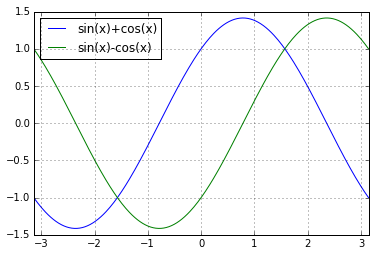

In [206]:
plotDF.plot()
plt.show()


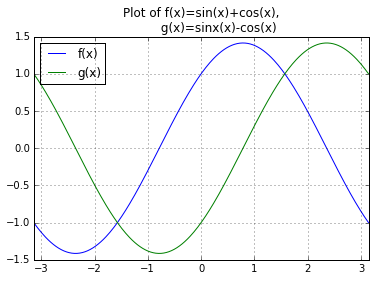

In [207]:
plotDF.columns=['f(x)','g(x)']
plotDF.plot(title='Plot of f(x)=sin(x)+cos(x), \n         g(x)=sinx(x)-cos(x)')
plt.show()


<b>Plot functions separately</b>

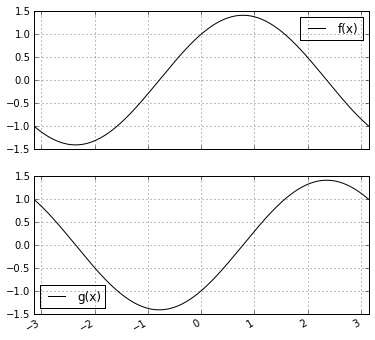

In [208]:
plotDF.plot(subplots=True, figsize=(6,6))
plt.show()
